In [50]:
import os, codecs
import pandas as pd
import numpy as np

PATH = './DATA/'

In [29]:
# 共享单车轨迹数据
bike_track = pd.concat([
    pd.read_csv(PATH + 'gxdc_gj20201221.csv'),
    pd.read_csv(PATH + 'gxdc_gj20201222.csv'),
    pd.read_csv(PATH + 'gxdc_gj20201223.csv'),
    pd.read_csv(PATH + 'gxdc_gj20201224.csv'),
    pd.read_csv(PATH + 'gxdc_gj20201225.csv')

])

# 按照单车ID和时间进行排序
bike_track = bike_track.sort_values(['BICYCLE_ID', 'LOCATING_TIME'])


In [30]:
import folium
m = folium.Map(location=[24.482426, 118.157606], zoom_start=12)
my_PolyLine=folium.PolyLine(locations=bike_track[bike_track['BICYCLE_ID'] == '000152773681a23a7f2d9af8e8902703'][['LATITUDE', 'LONGITUDE']].values,weight=5)
m.add_children(my_PolyLine)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  after removing the cwd from sys.path.


In [31]:
# 电子围栏数据
def bike_fence_format(s):
    s = s.replace('[', '').replace(']', '').split(',')
    s = np.array(s).astype(float).reshape(5, -1)
    return s

# 共享单车停车点位（电子围栏）数据
bike_fence = pd.read_csv(PATH + 'gxdc_tcd.csv')
bike_fence['FENCE_LOC'] = bike_fence['FENCE_LOC'].apply(bike_fence_format)

In [22]:
d = bike_fence['FENCE_LOC'].values[:10]
d

array([array([[118.103198,  24.527338],
       [118.103224,  24.527373],
       [118.103236,  24.527366],
       [118.103209,  24.527331],
       [118.103198,  24.527338]]),
       array([[118.103171,  24.527303],
       [118.103198,  24.527338],
       [118.103209,  24.527331],
       [118.103182,  24.527296],
       [118.103171,  24.527303]]),
       array([[118.103231,  24.527386],
       [118.103257,  24.527421],
       [118.10327 ,  24.527413],
       [118.103244,  24.527378],
       [118.103231,  24.527386]]),
       array([[118.103257,  24.527421],
       [118.103282,  24.527455],
       [118.103295,  24.527447],
       [118.10327 ,  24.527413],
       [118.103257,  24.527421]]),
       array([[118.102948,  24.527003],
       [118.102979,  24.527046],
       [118.102992,  24.527038],
       [118.102961,  24.526995],
       [118.102948,  24.527003]]),
       array([[118.102916,  24.526957],
       [118.102937,  24.52699 ],
       [118.102951,  24.526982],
       [118.102929,  24.

In [32]:
import folium
m = folium.Map(location=[24.482426, 118.157606], zoom_start=12)

for data in bike_fence['FENCE_LOC'].values[:100]:
    for i in range(len(data)):
        folium.Marker(list(data[i])[::-1]).add_to(m)
m

In [33]:
# 得出停车点 LATITUDE 范围
bike_fence['MIN_LATITUDE'] = bike_fence['FENCE_LOC'].apply(lambda x: np.min(x[:, 1]))
bike_fence['MAX_LATITUDE'] = bike_fence['FENCE_LOC'].apply(lambda x: np.max(x[:, 1]))

# 得到停车点 LONGITUDE 范围
bike_fence['MIN_LONGITUDE'] = bike_fence['FENCE_LOC'].apply(lambda x: np.min(x[:, 0]))
bike_fence['MAX_LONGITUDE'] = bike_fence['FENCE_LOC'].apply(lambda x: np.max(x[:, 0]))

from geopy.distance import geodesic
# 根据停车点 范围 计算具体的面积
bike_fence['FENCE_AREA'] = bike_fence.apply(lambda x: geodesic(
    (x['MIN_LATITUDE'], x['MIN_LONGITUDE']), (x['MAX_LATITUDE'], x['MAX_LONGITUDE'])
).meters, axis=1)

# 根据停车点 计算中心经纬度
bike_fence['FENCE_CENTER'] = bike_fence['FENCE_LOC'].apply(
    lambda x: np.mean(x[:-1, ::-1], 0)
)

In [ ]:
# 共享单车订单数据
bike_order = pd.read_csv(PATH + 'gxdc_dd.csv')
bike_order = bike_order.sort_values(['BICYCLE_ID', 'UPDATE_TIME'])
import folium
m = folium.Map(location=[24.482426, 118.157606], zoom_start=12)
my_PolyLine=folium.PolyLine(locations=bike_order[bike_order['BICYCLE_ID'] == '0000ff105fd5f9099b866bccd157dc50'][['LATITUDE', 'LONGITUDE']].values,weight=5)
m.add_children(my_PolyLine)

In [46]:
#bike_fence.head()
import geohash2 as geohash
bike_order['geohash'] = bike_order.apply(
    lambda x: geohash.encode(x['LATITUDE'], x['LONGITUDE'], precision=6), 
axis=1)

bike_fence['geohash'] = bike_fence['FENCE_CENTER'].apply(
    lambda x: geohash.encode(x[0], x[1], precision=6)
)

In [47]:
bike_order[bike_order['geohash'] == 'ws7gx9']

,BICYCLE_ID,LATITUDE,LONGITUDE,LOCK_STATUS,UPDATE_TIME,DAY,HOUR,DAY_HOUR,geohash
487671,004f9873bb4e6d9cf0ad25cf9f7eb24a,24.527919,118.111688,0,2020-12-24 07:18:01,24,07,2407,ws7gx9
502074,00753953f3c84a8abd1f6a54cd621d38,24.531710,118.108121,0,2020-12-23 08:21:52,23,08,2308,ws7gx9
517551,00753953f3c84a8abd1f6a54cd621d38,24.531751,118.108162,1,2020-12-23 08:27:35,23,08,2308,ws7gx9
465269,00af0ecaaee31786f2283ef81c10174a,24.531374,118.107521,1,2020-12-24 08:25:15,24,08,2408,ws7gx9
65021,00d78f5b3073d8c82b3e848b1a3e4edd,24.527360,118.103985,1,2020-12-21 08:23:15,21,08,2108,ws7gx9
...,...,...,...,...,...,...,...,...,...
408279,fe475249d02d3e47f07eb5c94cdc4a1b,24.531764,118.108175,1,2020-12-24 08:27:04,24,08,2408,ws7gx9
473797,fe976788585381d7aed4db1823d08227,24.527876,118.111530,1,2020-12-24 07:19:18,24,07,2407,ws7gx9
179689,feb96694fcef6dbcd86f14de19f1e692,24.529445,118.109238,0,2020-12-23 07:25:21,23,07,2307,ws7gx9
491991,feda51ed35897b35fb4056957a75bda9,24.532177,118.107760,0,2020-12-24 07:31:22,24,07,2407,ws7gx9


In [43]:
# 提取订单时间信息
bike_order['UPDATE_TIME'] = pd.to_datetime(bike_order['UPDATE_TIME'])
bike_order['DAY'] = bike_order['UPDATE_TIME'].dt.day.astype(object)
bike_order['DAY'] = bike_order['DAY'].apply(str)

bike_order['HOUR'] = bike_order['UPDATE_TIME'].dt.hour.astype(object)
bike_order['HOUR'] = bike_order['HOUR'].apply(str)
bike_order['HOUR'] = bike_order['HOUR'].str.pad(width=2,side='left',fillchar='0')

# 日期和时间进行拼接
bike_order['DAY_HOUR'] = bike_order['DAY'] + bike_order['HOUR']

In [45]:
bike_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585292 entries, 34481 to 433347
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   BICYCLE_ID   585292 non-null  object        
 1   LATITUDE     585292 non-null  float64       
 2   LONGITUDE    585292 non-null  float64       
 3   LOCK_STATUS  585292 non-null  int64         
 4   UPDATE_TIME  585292 non-null  datetime64[ns]
 5   DAY          585292 non-null  object        
 6   HOUR         585292 non-null  object        
 7   DAY_HOUR     585292 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 40.2+ MB


In [48]:
#统计每个区域每个时间的单车情况
bike_inflow = pd.pivot_table(bike_order[bike_order['LOCK_STATUS'] == 1], 
                   values='LOCK_STATUS', index=['geohash'],
                    columns=['DAY_HOUR'], aggfunc='count', fill_value=0
)

bike_outflow = pd.pivot_table(bike_order[bike_order['LOCK_STATUS'] == 0], 
                   values='LOCK_STATUS', index=['geohash'],
                    columns=['DAY_HOUR'], aggfunc='count', fill_value=0
)

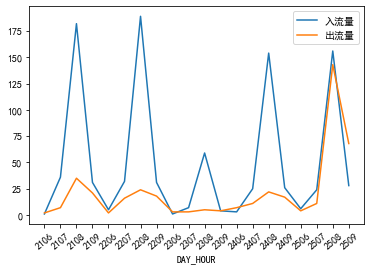

In [52]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
bike_inflow.loc['wsk593'].plot()
bike_outflow.loc['wsk593'].plot()
plt.xticks(list(range(bike_inflow.shape[1])), bike_inflow.columns, rotation=40)
plt.legend(['入流量', '出流量'])

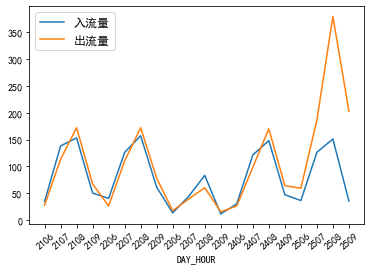

In [57]:
bike_inflow.loc['wsk52r'].plot()
bike_outflow.loc['wsk52r'].plot()
plt.xticks(list(range(bike_inflow.shape[1])), bike_inflow.columns, rotation=40)
prop = {'size':'large'}
plt.legend(['入流量', '出流量'], prop = prop)

In [26]:
# 轨道站点进站客流数据
rail_inflow = pd.read_excel(PATH + 'gdzdtjsj_jzkl.csv')
rail_inflow = rail_inflow.drop(0)

# 轨道站点出站客流数据
rail_outflow = pd.read_excel(PATH + 'gdzdtjsj_czkl.csv')
rail_outflow = rail_outflow.drop(0)

# 轨道站点闸机设备编码数据
rail_device = pd.read_excel(PATH + 'gdzdkltj_zjbh.csv')
rail_device.columns = [
    'LINE_NO', 'STATION_NO', 'STATION_NAME',
    'A_IN_MANCHINE', 'A_OUT_MANCHINE', 
    'B_IN_MANCHINE', 'B_OUT_MANCHINE'
]
rail_device = rail_device.drop(0)

In [58]:
bike_inflow = pd.pivot_table(bike_order[bike_order['LOCK_STATUS'] == 1], 
                   values='LOCK_STATUS', index=['geohash'],
                    columns=['DAY'], aggfunc='count', fill_value=0
)

bike_outflow = pd.pivot_table(bike_order[bike_order['LOCK_STATUS'] == 0], 
                   values='LOCK_STATUS', index=['geohash'],
                    columns=['DAY'], aggfunc='count', fill_value=0
)

In [59]:
bike_remain = (bike_inflow - bike_outflow).fillna(0)

# 存在骑走的车数量 大于 进来的车数量
bike_remain[bike_remain < 0] = 0  

# 按照天求平均
bike_remain = bike_remain.sum(1)

In [60]:
# 总共有993条街
bike_fence['STREET'] = bike_fence['FENCE_ID'].apply(lambda x: x.split('_')[0])

# 留存车辆 / 街道停车位总面积，计算得到密度
bike_density = bike_fence.groupby(['STREET'])['geohash'].unique().apply(
    lambda hs: np.sum([bike_remain[x] for x in hs])
) / bike_fence.groupby(['STREET'])['FENCE_AREA'].sum()

# 按照密度倒序
bike_density = bike_density.sort_values(ascending=False).reset_index()

In [61]:
bike_density.head(10)

,STREET,0
0,新丰路(火炬路至火炬北路),264.109027
1,金榜西路0,261.504821
2,市政19,196.202314
3,市政2,192.822917
4,市政1,192.085638
5,市政20,190.696068
6,市政11,189.576098
7,市政15,185.743613
8,市政17,174.770755
9,市政6,171.897058


In [63]:
bike_fence['FENCE_CENTER']

0                       [24.527352, 118.10321675]
1                 [24.527317000000004, 118.10319]
2               [24.527399499999998, 118.1032505]
3                 [24.527434, 118.10327600000001]
4                         [24.5270205, 118.10297]
                           ...                   
14066         [24.4392363933, 118.11646929919999]
14067           [24.43924593495, 118.11597365625]
14068    [24.439245983600003, 118.11561291917499]
14069         [24.440383766375, 118.115210615875]
14070            [24.43916873935, 118.1156600018]
Name: FENCE_CENTER, Length: 14071, dtype: object

In [1]:
from sklearn.neighbors import NearestNeighbors
import sklearn

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html
print("Sklearn verion is {}".format(sklearn.__version__))
knn = NearestNeighbors(metric = "haversine", n_jobs=-1, algorithm='brute')
knn.fit(np.stack(bike_fence['FENCE_CENTER'].values))

Sklearn verion is 0.24.1


NameError: name 'np' is not defined

In [73]:
from sklearn.neighbors import NearestNeighbors
#from sklearn.neighbors import DistanceMetric
NearestNeighbors.VALID_METRICS['brute']

AttributeError: type object 'NearestNeighbors' has no attribute 'VALID_METRICS'